# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.display import clear_output, display, Math

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [92]:
city = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
date = []

print('Beginning Data Retrieval')
print('-----------------------------')
nn = 1
for cit in cities:
    if nn % 10 == 1:
        clear_output()
    print(f'Processing Record {nn}: {cit}')
    nn += 1
    response = requests.get(query_url + cit).json()
    try:
        city.append(response['name']) # City name
        longitude.append(response['coord']['lon']) # Longitude
        latitude.append(response['coord']['lat']) # Latitude
        country.append(response['sys']['country']) # Country
        cloudiness.append(response['clouds']['all']) # Cloudiness?
        humidity.append(response['main']['humidity']) # Humidity
        max_temp.append(response['main']['temp_max']) # Max Temp
        wind_speed.append(response['wind']['speed']) # Wind Speed
        date.append(time.localtime(response['dt'])[0:3]) # Date
    except (KeyError, AttributeError):
        print(f'City {city} not found. Skipping...')
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Processing Record 611: codrington
Processing Record 612: usta muhammad
Processing Record 613: saquena
Processing Record 614: sao gabriel da cachoeira
Processing Record 615: grande prairie
Processing Record 616: yuzhno-sukhokumsk
-----------------------------
Data Retrieval Complete
-----------------------------


City          535

Cloudiness    535

Country       535

Date          535

Humidity      535

Lat           535

Lng           535

Max Temp      535

Wind Speed    535

In [72]:
response = requests.get(query_url + 'esperance').json()

In [90]:
# response['coord']['lon'] # Longitude
# response['coord']['lat'] # Latitude
# response['sys']['country'] # Country
# response['clouds']['all'] # Cloudiness?
# response['main']['humidity'] # Humidity
# response['main']['temp_max'] # Max Temp
# response['wind']['speed'] # Wind Speed
time.localtime(response['dt'])[0:3]
# response['dt']

(2019, 12, 29)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
df = pd.DataFrame(
    {
        'City': city,
        'Country': country,
        'Longitude': longitude,
        'Latitude': latitude,
        'Humidity': humidity,
        'Cloudiness': cloudiness,
        'Humidity': humidity,
        'Max_Temp': max_temp,
        'Wind_Speed': wind_speed,
        'Date': date
    }
)

df.head()

,City,Country,Longitude,Latitude,Humidity,Cloudiness,Max_Temp,Wind_Speed,Date
0,Victoria,BN,115.24,5.28,88,75,27.00,2.10,"(2019, 12, 29)"
1,Flinders,AU,150.85,-34.58,44,87,27.00,2.60,"(2019, 12, 29)"
2,Springbok,ZA,17.88,-29.67,59,0,11.38,0.32,"(2019, 12, 29)"
3,Senno,RU,27.95,57.76,87,100,0.00,5.00,"(2019, 12, 29)"
4,Quatre Cocos,MU,57.76,-20.21,94,75,25.00,10.80,"(2019, 12, 29)"


In [98]:
df.Country.value_counts()

RU    72
US    43
CA    33
AU    29
BR    25
      ..
BG     1
CR     1
PL     1
KM     1
GE     1
Name: Country, Length: 115, dtype: int64

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

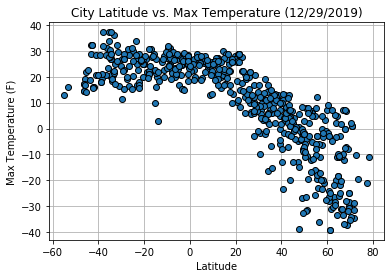

In [101]:
plt.scatter(df.Latitude, df.Max_Temp, edgecolors='black', zorder=2)
datestring = f'{df.Date[0][1]}/{df.Date[0][2]}/{df.Date[0][0]}'
plt.title(f'City Latitude vs. Max Temperature ({datestring})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(zorder=0)

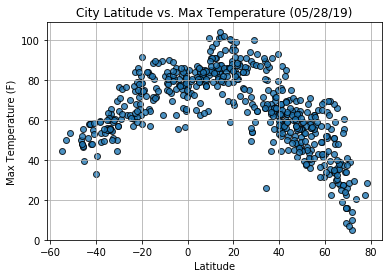

#### Latitude vs. Humidity Plot

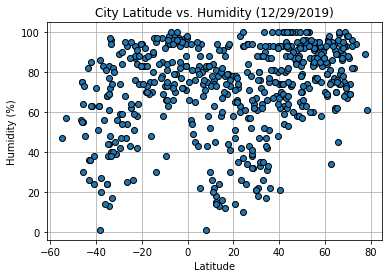

In [102]:
plt.scatter(df.Latitude, df.Humidity, edgecolors='black', zorder=2)
plt.title(f'City Latitude vs. Humidity ({datestring})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(zorder=0)

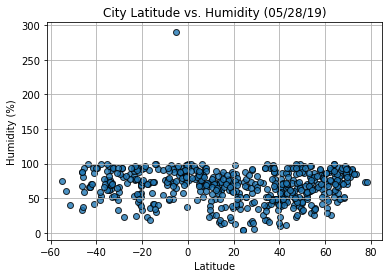

#### Latitude vs. Cloudiness Plot

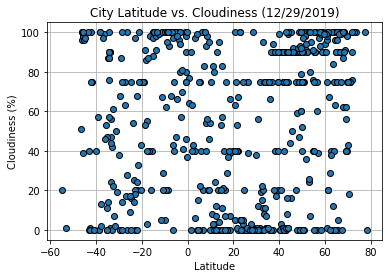

In [103]:
plt.scatter(df.Latitude, df.Cloudiness, edgecolors='black', zorder=2)
plt.title(f'City Latitude vs. Cloudiness ({datestring})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(zorder=0)

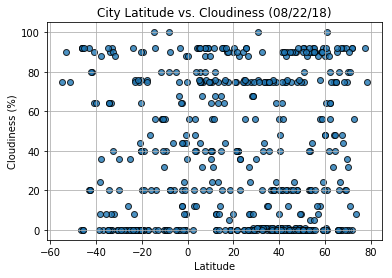

#### Latitude vs. Wind Speed Plot

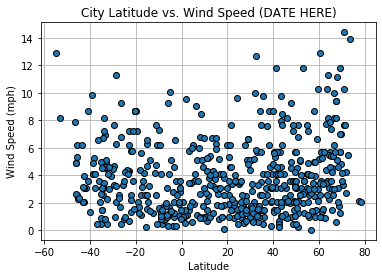

In [9]:
plt.scatter(df.Latitude, df.Wind_Speed, edgecolors='black', zorder=2)
plt.title(f'City Latitude vs. Wind Speed ({DATE HERE})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(zorder=0)

## Linear Regression

In [57]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinReg(x_values, y_values, xlabel = '', ylabel = '', title = '', eqnx = 0, eqny = 0):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (eqnx, eqny), fontsize=15, color="red")
    display(Math(f'R^2 = {round(rvalue, 3)}'))

In [11]:
# Create Northern and Southern Hemisphere DataFrames
north_df = df[df.Latitude > 0]
south_df = df[df.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Math object>

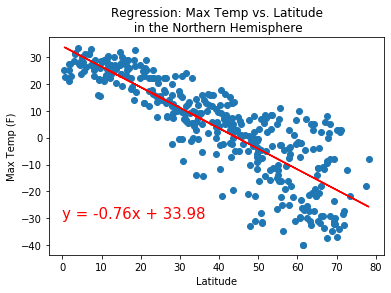

In [58]:
plotLinReg(north_df.Latitude, north_df.Max_Temp, xlabel = 'Latitude', ylabel = 'Max Temp (F)',
          title = "Regression: Max Temp vs. Latitude\n in the Northern Hemisphere",
          eqnx = 0, eqny = -30)

The r-squared is: -0.8151657406810827


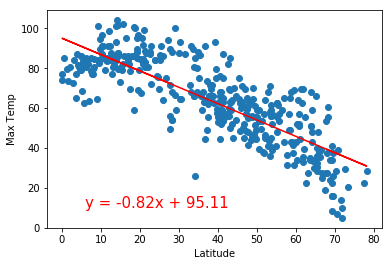

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Math object>

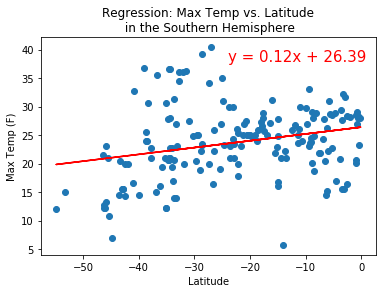

In [59]:
plotLinReg(south_df.Latitude, south_df.Max_Temp, xlabel = 'Latitude', ylabel = 'Max Temp (F)',
          title = "Regression: Max Temp vs. Latitude\n in the Southern Hemisphere",
          eqnx = -24, eqny = 38)

The r-squared is: 0.760263355051646


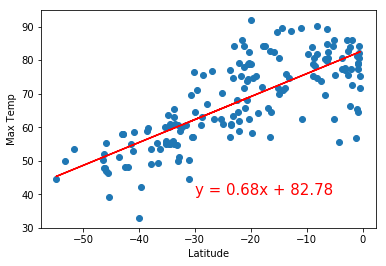

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Math object>

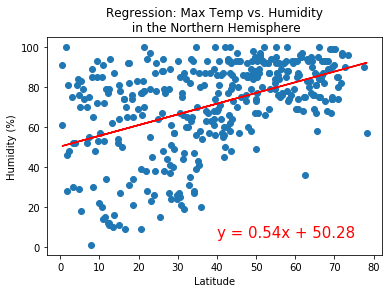

In [60]:
plotLinReg(north_df.Latitude, north_df.Humidity, xlabel = 'Latitude', ylabel = 'Humidity (%)',
          title = "Regression: Max Temp vs. Humidity\n in the Northern Hemisphere",
          eqnx = 40, eqny = 5)

The r-squared is: 0.10358336015746494


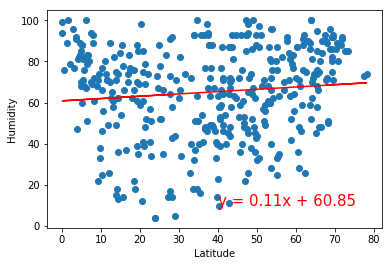

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Math object>

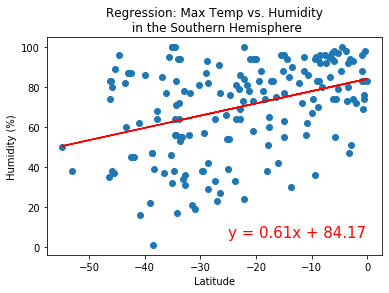

In [61]:
plotLinReg(south_df.Latitude, south_df.Humidity, xlabel = 'Latitude', ylabel = 'Humidity (%)',
          title = "Regression: Max Temp vs. Humidity\n in the Southern Hemisphere",
          eqnx = -25, eqny = 5)

The r-squared is: 0.14689473425583055


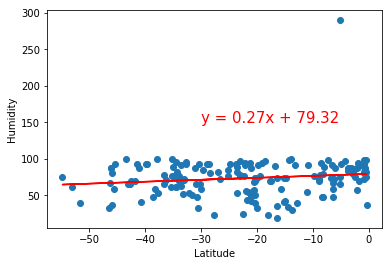

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Math object>

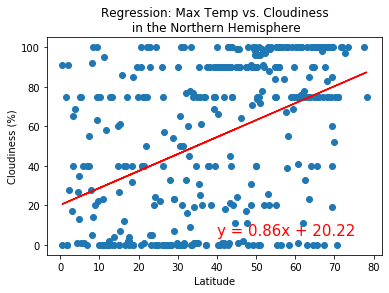

In [62]:
plotLinReg(north_df.Latitude, north_df.Cloudiness, xlabel = 'Latitude', ylabel = 'Cloudiness (%)',
          title = "Regression: Max Temp vs. Cloudiness\n in the Northern Hemisphere",
          eqnx = 40, eqny = 5)

The r-squared is: -0.08733547918934018


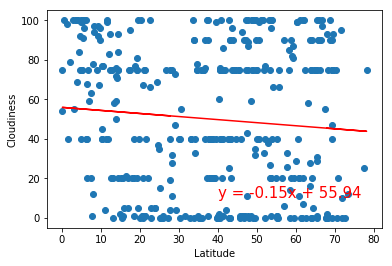

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Math object>

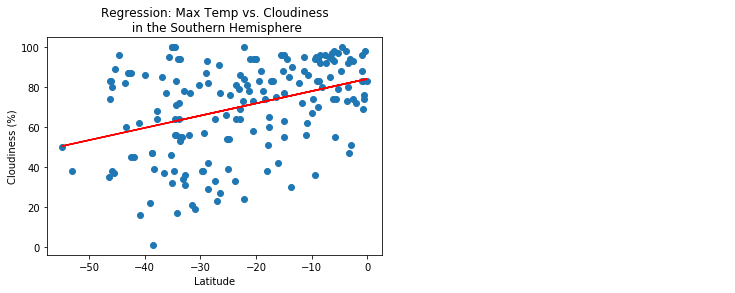

In [63]:
plotLinReg(south_df.Latitude, south_df.Humidity, xlabel = 'Latitude', ylabel = 'Cloudiness (%)',
          title = "Regression: Max Temp vs. Cloudiness\n in the Southern Hemisphere",
          eqnx = 40, eqny = 5)

The r-squared is: 0.21881426893991618


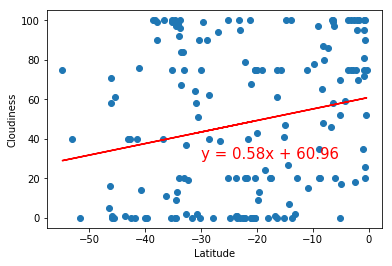

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Math object>

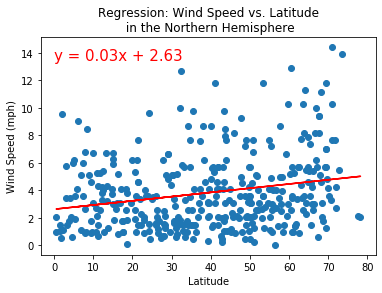

In [67]:
plotLinReg(north_df.Latitude, north_df.Wind_Speed, xlabel = 'Latitude', ylabel = 'Wind Speed (mph)',
          title = "Regression: Wind Speed vs. Latitude\n in the Northern Hemisphere",
          eqnx = 0, eqny = 13.5)

The r-squared is: 0.1071382774388479


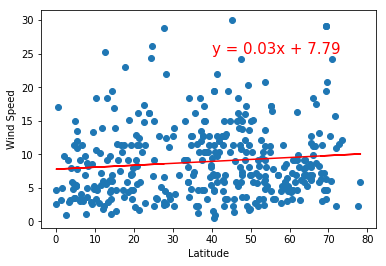

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Math object>

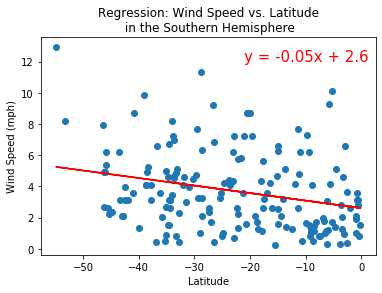

In [71]:
plotLinReg(south_df.Latitude, south_df.Wind_Speed, xlabel = 'Latitude', ylabel = 'Wind Speed (mph)',
          title = "Regression: Wind Speed vs. Latitude\n in the Southern Hemisphere",
          eqnx = -21, eqny = 12)

The r-squared is: -0.322483077139538


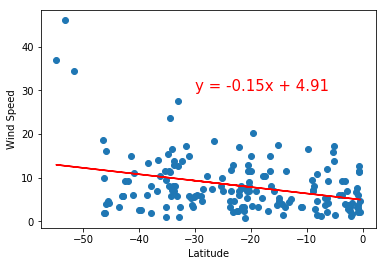